<a href="https://colab.research.google.com/github/miguel-fc/Colab-Notebooks/blob/main/j(r)VAE_organelles_multi_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Runs a jVAE and jrVAE on cyanobacteria images with organelles. The images has been "binary" segmented. The original images have 3 channels. Here we are only deadling with the channel that contains the carboxysome (the organelles).

3 images are included in the training of the VAES.

In [1]:
import os
import cv2
import imutils

import numpy as np

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

In [2]:
!gdown "https://drive.google.com/uc?id=1YhQExzA4OJVkqaukaf5y9hQAaGWFGJZR"
!gdown "https://drive.google.com/uc?id=1e1jKSuhzaOCgBlCSYm0nUumSg5HM8BSu"
!gdown "https://drive.google.com/uc?id=1BsT7uiEyewVBBIGZkRm5lPYo1q4wOeWE"

Downloading...
From: https://drive.google.com/uc?id=1YhQExzA4OJVkqaukaf5y9hQAaGWFGJZR
To: /content/threshold_ccmlpdt4.npy
22.6MB [00:00, 71.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e1jKSuhzaOCgBlCSYm0nUumSg5HM8BSu
To: /content/threshold_control09.npy
22.6MB [00:00, 106MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1BsT7uiEyewVBBIGZkRm5lPYo1q4wOeWE
To: /content/threshold_control02.npy
22.6MB [00:00, 106MB/s] 


In [3]:
image_0 = np.load("threshold_ccmlpdt4.npy")
image_1 = np.load("threshold_control09.npy")
image_2 = np.load("threshold_control02.npy")

In [4]:
image_gray = rgb2gray(image_0)
fig, ax = plt.subplots(figsize=(25, 10))
ax.imshow(image_gray,cmap='gray') 
plt.show()

In [5]:
image_gray = rgb2gray(image_1)
fig, ax = plt.subplots(figsize=(25, 10))
ax.imshow(image_gray,cmap='gray') 
plt.show()

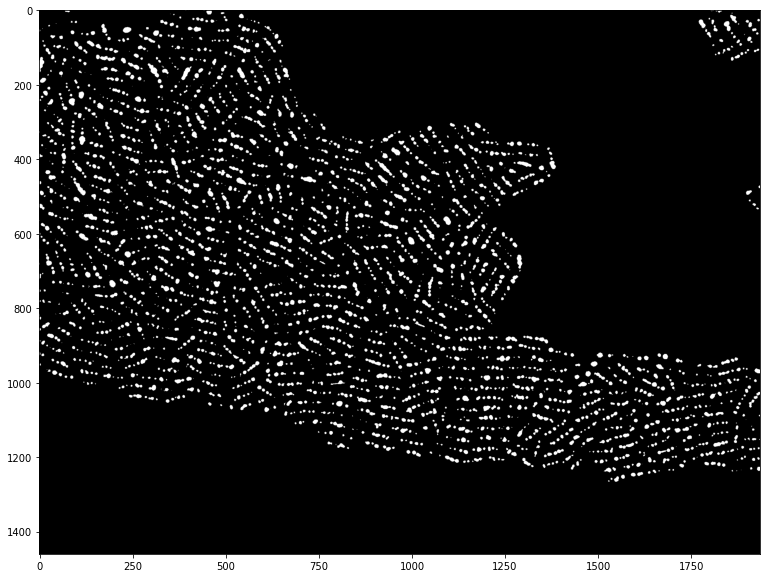

In [6]:
image_gray = rgb2gray(image_2)
fig, ax = plt.subplots(figsize=(25, 10))
ax.imshow(image_gray,cmap='gray') 
plt.show()

In [7]:
image_0 = (image_0[np.newaxis,::,::])

In [8]:
image_1 = (image_1[np.newaxis,::,::])

In [9]:
image_2 = (image_2[np.newaxis,::,::])

In [10]:
image = np.vstack((image_0,image_1,image_2))

In [11]:
image.shape[0]

3

/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma 

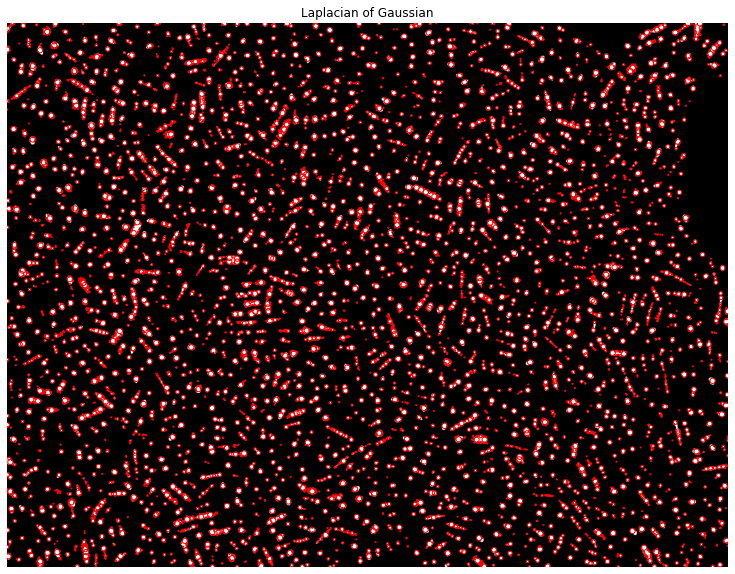

In [14]:
coord_dict={}
myclass = 0.0

for i in range(image.shape[0]):

  image_gray = image[i]

  # blobs_log = blob_log(image_gray, min_sigma = .1, max_sigma=5, num_sigma=10, threshold=.06, overlap = 0.1)
  blobs_log = blob_log(image_gray, max_sigma=5, num_sigma=10, threshold=.1)


  # Compute radii in the 3rd column.
  blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

  blobs_list = [blobs_log]
  colors = ['red']
  titles = ['Laplacian of Gaussian']
  sequence = zip(blobs_list, colors, titles)

  blobs_list = [blobs_log]
  colors = ['red']
  titles = ['Laplacian of Gaussian']
  sequence = zip(blobs_list, colors, titles)
  fig, ax = plt.subplots(figsize=(25, 10))
  for idx, (blobs, color, title) in enumerate(sequence):
    ax.set_title(title)
    ax.imshow(image[i],cmap='gray')  
    for blob in blobs:
      y, x, r = blob
      c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
      ax.add_patch(c) 
      ax.set_axis_off()

  plt.show()

  blobs_log[:,2] = myclass
  coord_dict[i]= blobs_log


In [15]:
# This is our new dictionary containing frame number and blob coordinates
# for i in coord_dict:
#   print(coord_dict[i])
# coord_dict

In [16]:
!pip install atomai

     |████████████████████████████████| 133kB 12.8MB/s 
     |████████████████████████████████| 184kB 11.4MB/s 
     |████████████████████████████████| 993kB 22.1MB/s 
     |████████████████████████████████| 870kB 56.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1


In [17]:
import atomai as aoi

In [18]:
image = image[::,::,::,np.newaxis]

In [19]:
image.shape

(3, 1460, 1936, 1)

In [20]:
window_size = 48
# subimg, subimg_coord, subimg_frame = aoi.utils.extract_subimages(image,coord_dict,window_size)
subimg_coord_frame = aoi.utils.extract_subimages(image,coord_dict,window_size)

In [21]:
subimg = subimg_coord_frame[0]

In [22]:
subimg.shape

(18142, 48, 48, 1)

In [23]:
subimg = np.squeeze(subimg*1.0)
subimg = (subimg - subimg.min())/(subimg.max() - subimg.min())
subimg.shape

(18142, 48, 48)

In [24]:
subimg_ind = np.zeros_like(subimg)

for i, ind in enumerate(subimg):
  subimg_ind[i] = (ind - ind.min())/(ind.max() - ind.min())

In [25]:
subimg_ind.shape

(18142, 48, 48)

In [26]:
plt.imshow(subimg_ind[1,:,:])
plt.colorbar()

**jVAE**

In [27]:
!gdown "https://drive.google.com/uc?id=1--derV5BuxyKDzlSChOnL7p7RwUA-mAa"

Downloading...
From: https://drive.google.com/uc?id=1--derV5BuxyKDzlSChOnL7p7RwUA-mAa
To: /content/jvae-48-1024.tar
107MB [00:00, 174MB/s] 


In [28]:
jvae= aoi.models.load_model("jvae-48-1024.tar")
# Intitialize model
# input_dim = (window_size, window_size)

# jvae = aoi.models.jVAE(input_dim, latent_dim=2, discrete_dim=[3],
#                         numlayers_encoder=3, numhidden_encoder=1024,
#                         numlayers_decoder=3, numhidden_decoder=1024,
#                         skip=False) 
# Train
jvae.fit(subimg_ind, training_cycles=50, batch_size=32, loss="mse")

Epoch: 1/50, Training loss: 99.7593
Epoch: 2/50, Training loss: 99.7419
Epoch: 3/50, Training loss: 99.7343
Epoch: 4/50, Training loss: 99.7685
Epoch: 5/50, Training loss: 99.7078
Epoch: 6/50, Training loss: 99.7416
Epoch: 7/50, Training loss: 99.7703
Epoch: 8/50, Training loss: 99.7102
Epoch: 9/50, Training loss: 99.7149
Epoch: 10/50, Training loss: 99.7201
Epoch: 11/50, Training loss: 99.7369
Epoch: 12/50, Training loss: 99.7463
Epoch: 13/50, Training loss: 99.6762
Epoch: 14/50, Training loss: 99.7631
Epoch: 15/50, Training loss: 99.7064
Epoch: 16/50, Training loss: 99.7071
Epoch: 17/50, Training loss: 99.7334
Epoch: 18/50, Training loss: 99.7546
Epoch: 19/50, Training loss: 99.7136
Epoch: 20/50, Training loss: 99.6780
Epoch: 21/50, Training loss: 99.7179
Epoch: 22/50, Training loss: 99.7399
Epoch: 23/50, Training loss: 99.7867
Epoch: 24/50, Training loss: 99.7462
Epoch: 25/50, Training loss: 99.7314
Epoch: 26/50, Training loss: 99.7281
Epoch: 27/50, Training loss: 99.7346
Epoch: 28/

In [29]:
zj_mean, zj_sd, alphas = jvae.encode(subimg_ind)

In [30]:
for i in range(2):
    jvae.manifold_traversal(i);

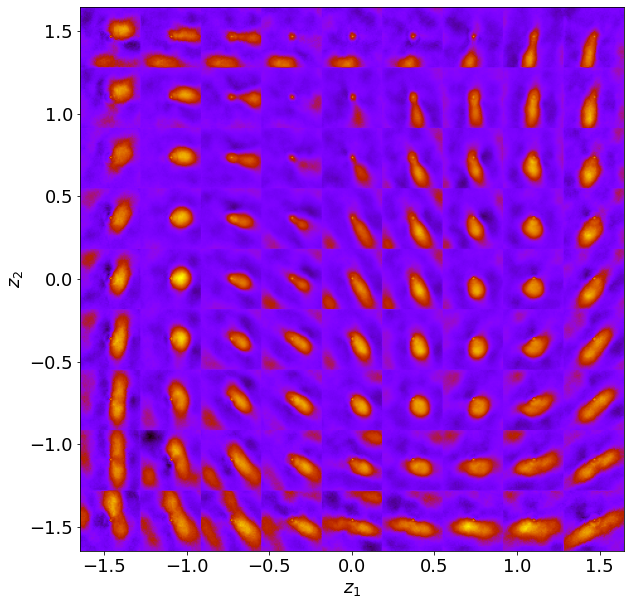

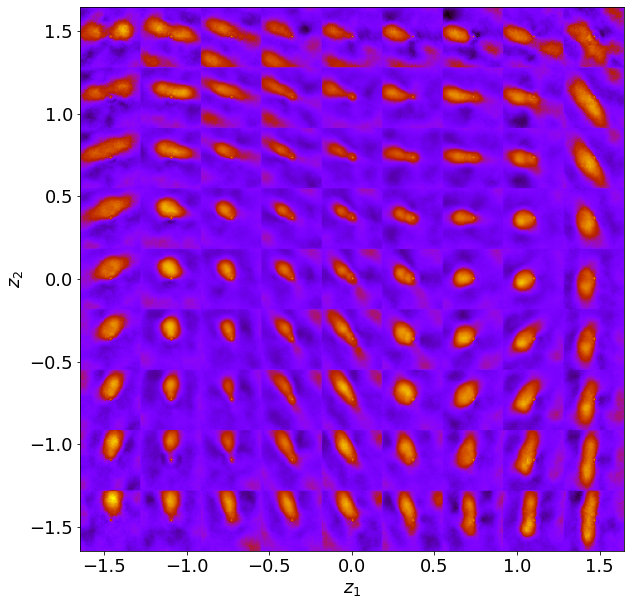

In [31]:
for i in range(3):
    jvae.manifold2d(disc_idx=i)

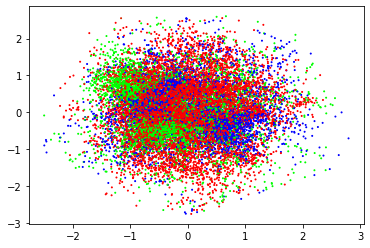

In [32]:
plt.scatter(zj_mean[:,0], zj_mean[:,1], c = alphas, s = 1)

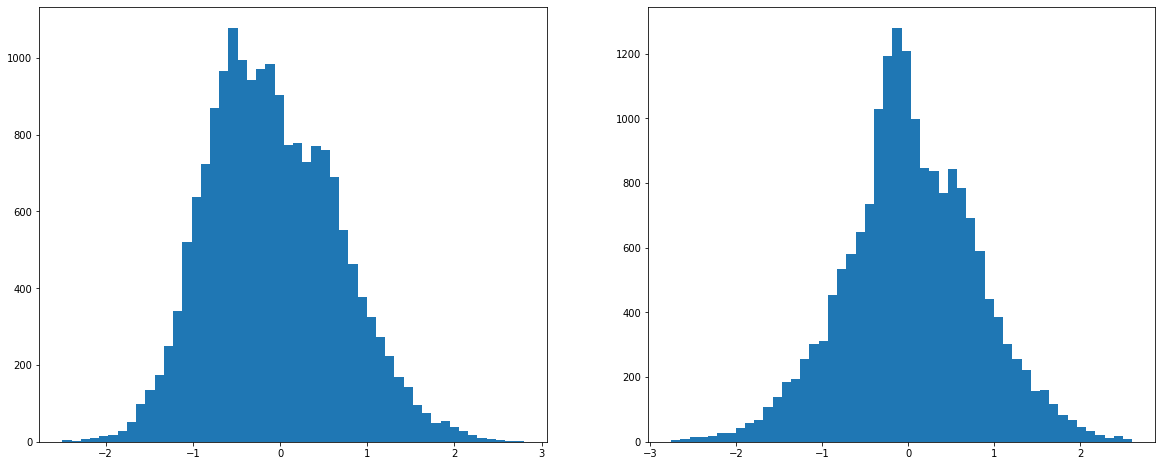

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[0].hist(zj_mean[:,0], bins = 50);

ax[1] = plt.subplot(1, 2, 2)
ax[1].hist(zj_mean[:,1], bins = 50);

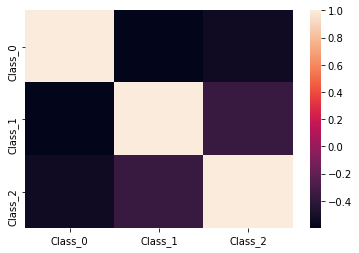

In [34]:
ci = np.array([np.argmax(cl) for cl in alphas])
data = np.hstack((np.expand_dims(ci, axis = 1)))

data = pd.DataFrame(data, columns=['Class'])

data = pd.concat([data,pd.get_dummies(data['Class'], 
                                      prefix='Class',dummy_na=False)],axis=1).drop(['Class'],axis=1)

data.tail()

ax = sns.heatmap(data.corr())

<function matplotlib.pyplot.show>

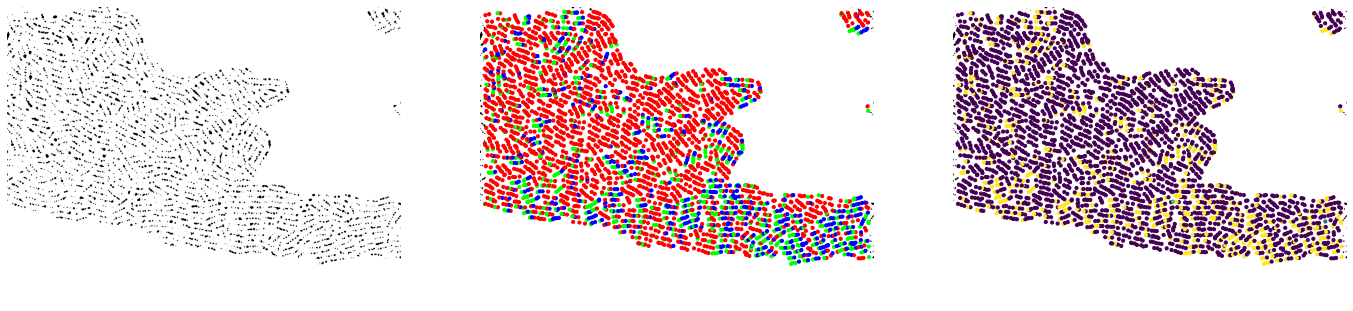

In [55]:
#Pick a frame to project the classes
frame = 2
work_image = image[frame,::,::,0]

frame_subimg = subimg_coord_frame[0][subimg_coord_frame[2]==frame]
frame_subimg = np.squeeze(frame_subimg*1.0)
frame_subimg = (frame_subimg - frame_subimg.min())/(frame_subimg.max() - frame_subimg.min())
frame_subimg_ind = np.zeros_like(frame_subimg)

for i, ind in enumerate(frame_subimg):
  frame_subimg_ind[i] = (ind - ind.min())/(ind.max() - ind.min())

# subimg.shape
# subimg_coord = subimg_coord_frame[1][subimg_coord_frame[2]==frame]

frame_zj_mean, frame_zj_sd, frame_alphas = jvae.encode(frame_subimg_ind)

com_i = subimg_coord = subimg_coord_frame[1][subimg_coord_frame[2]==frame]
frame_zvae_i = frame_zj_mean # get latent variables (image) for this frame

fig, axes = plt.subplots(1, 3, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0])
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

# ax[1].scatter(com_i[:,1], com_i[:,0], c = frame_zvae_i[:,0], s = 10)
ax[1].scatter(com_i[:,1], com_i[:,0], c = frame_alphas, s = 10)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')

# ax[2].scatter(com_i[:,1], com_i[:,0], c = frame_zvae_i[:,1], s = 10)
ax[2].scatter(com_i[:,1], com_i[:,0], c = frame_alphas[:,1], s = 10)
ax[2].imshow(work_image, cmap = 'Greys')
ax[2].axis('off')

plt.show

**jrVAE**

In [36]:
!gdown "https://drive.google.com/uc?id=148lM9cTTc8oAU5Y3Uy7udLLfOVp52XP2"

Downloading...
From: https://drive.google.com/uc?id=148lM9cTTc8oAU5Y3Uy7udLLfOVp52XP2
To: /content/jrvae-48-1024.tar
91.6MB [00:00, 138MB/s] 


In [38]:
jrvae= aoi.models.load_model("jrvae-48-1024.tar")
# # Intitialize model
# input_dim = (window_size, window_size)

# jrvae = aoi.models.jrVAE(input_dim, latent_dim=2, discrete_dim=[3],
#                         numlayers_encoder=3, numhidden_encoder=1024,
#                         numlayers_decoder=3, numhidden_decoder=1024,
#                         skip=False) 
# Train
jrvae.fit(subimg_ind, training_cycles=10, batch_size=32, loss="mse")

Epoch: 1/10, Training loss: 94.3034
Epoch: 2/10, Training loss: 97.4460
Epoch: 3/10, Training loss: 100.8045
Epoch: 4/10, Training loss: 104.2168
Epoch: 5/10, Training loss: 107.6839
Epoch: 6/10, Training loss: 111.0049
Epoch: 7/10, Training loss: 113.6868
Epoch: 8/10, Training loss: 113.8233
Epoch: 9/10, Training loss: 113.9083
Epoch: 10/10, Training loss: 113.9101


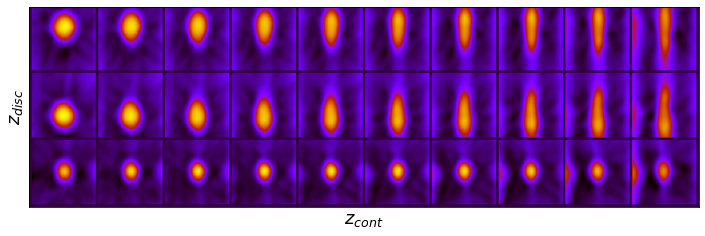

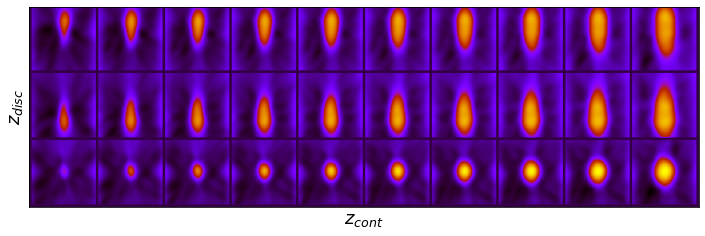

In [39]:
for i in range(2):
    jrvae.manifold_traversal(i);

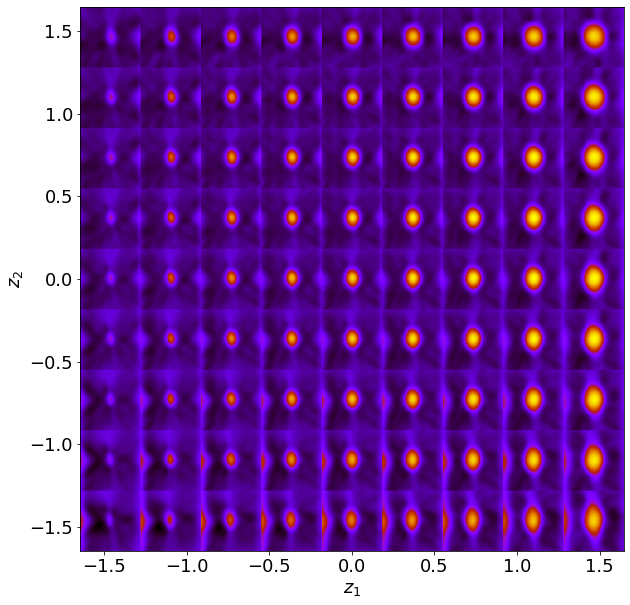

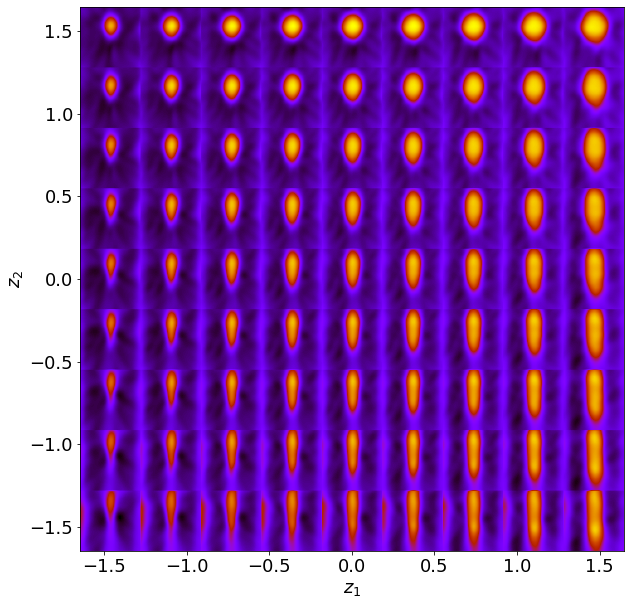

In [40]:
for i in range(3):
    jrvae.manifold2d(disc_idx=i)

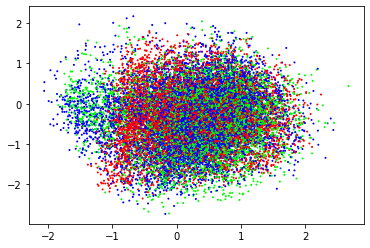

In [41]:
a, b, c = jrvae.encode(subimg_ind)
plt.scatter(a[:,3], a[:,4], c = c, s = 1)

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[0].hist(a[:,3], bins = 50);

ax[1] = plt.subplot(1, 2, 2)
ax[1].hist(a[:,4], bins = 50);

In [43]:
ci = np.array([np.argmax(cl) for cl in c])
data = np.hstack((np.expand_dims(ci, axis = 1)))

data = pd.DataFrame(data, columns=['Class'])

data = pd.concat([data,pd.get_dummies(data['Class'], 
                                      prefix='Class',dummy_na=False)],axis=1).drop(['Class'],axis=1)

data.tail()

Class_0  Class_1  Class_2
18137        1        0        0
18138        1        0        0
18139        0        1        0
18140        0        1        0
18141        0        0        1

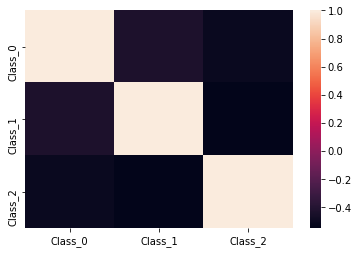

In [44]:
ax = sns.heatmap(data.corr())

<function matplotlib.pyplot.show>

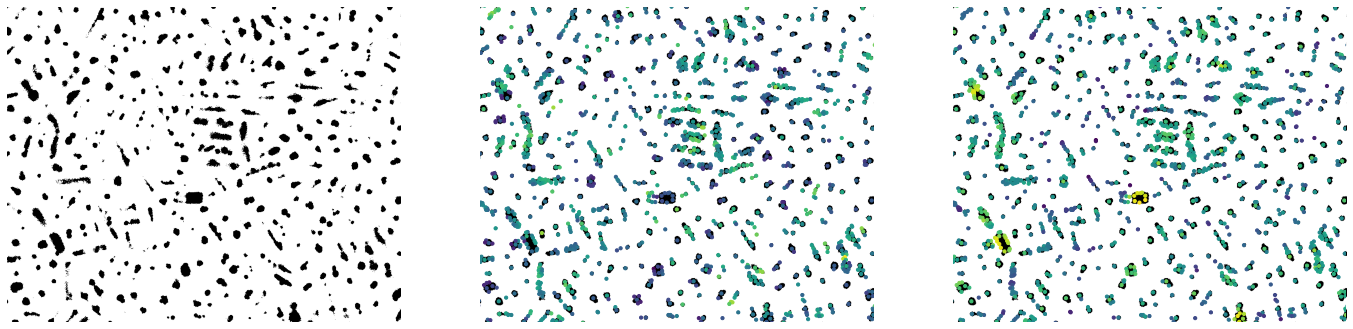

In [60]:
#Pick a frame to project the classes
frame = 0
work_image = image[frame,::,::,0]

frame_subimg = subimg_coord_frame[0][subimg_coord_frame[2]==frame]
frame_subimg = np.squeeze(frame_subimg*1.0)
frame_subimg = (frame_subimg - frame_subimg.min())/(frame_subimg.max() - frame_subimg.min())
frame_subimg_ind = np.zeros_like(frame_subimg)

for i, ind in enumerate(frame_subimg):
  frame_subimg_ind[i] = (ind - ind.min())/(ind.max() - ind.min())

frame_zj_mean, frame_zj_sd, frame_alphas = jrvae.encode(frame_subimg_ind)

com_i = subimg_coord = subimg_coord_frame[1][subimg_coord_frame[2]==frame]
frame_zvae_i = frame_zj_mean # get latent variables (image) for this frame

fig, axes = plt.subplots(1, 3, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0])
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(com_i[:,1], com_i[:,0], c = frame_zvae_i[:,3], s = 10)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
ax[1].set_xlim([250, 1000])
ax[1].set_ylim([400, 1000])

ax[2].scatter(com_i[:,1], com_i[:,0], c = frame_zvae_i[:,4], s = 10)
ax[2].imshow(work_image, cmap = 'Greys')
ax[2].axis('off')

plt.show

<function matplotlib.pyplot.show>

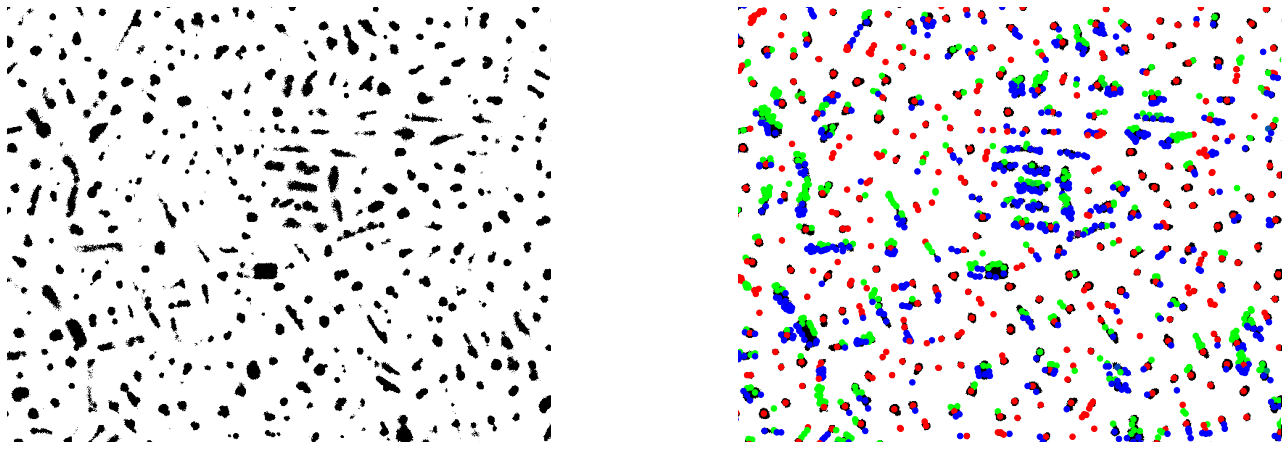

In [65]:
#Pick a frame to project the classes
frame = 0
work_image = image[frame,::,::,0]

frame_subimg = subimg_coord_frame[0][subimg_coord_frame[2]==frame]
frame_subimg = np.squeeze(frame_subimg*1.0)
frame_subimg = (frame_subimg - frame_subimg.min())/(frame_subimg.max() - frame_subimg.min())
frame_subimg_ind = np.zeros_like(frame_subimg)

for i, ind in enumerate(frame_subimg):
  frame_subimg_ind[i] = (ind - ind.min())/(ind.max() - ind.min())

frame_zj_mean, frame_zj_sd, frame_alphas = jrvae.encode(frame_subimg_ind)

com_i = subimg_coord = subimg_coord_frame[1][subimg_coord_frame[2]==frame]
frame_zvae_i = frame_zj_mean # get latent variables (image) for this frame

fig, axes = plt.subplots(1, 3, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(com_i[:,1], com_i[:,0], c = frame_alphas, s = 30)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
ax[1].set_xlim([250, 1000])
ax[1].set_ylim([400, 1000])

plt.show

<function matplotlib.pyplot.show>

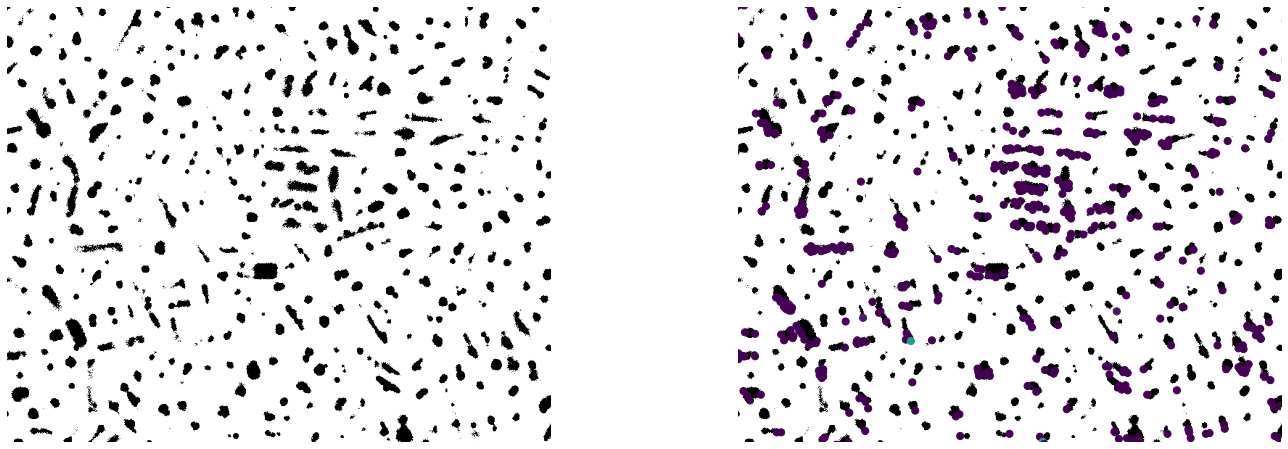

In [72]:
#Pick a frame to project the classes
frame = 0
work_image = image[frame,::,::,0]

frame_subimg = subimg_coord_frame[0][subimg_coord_frame[2]==frame]
frame_subimg = np.squeeze(frame_subimg*1.0)
frame_subimg = (frame_subimg - frame_subimg.min())/(frame_subimg.max() - frame_subimg.min())
frame_subimg_ind = np.zeros_like(frame_subimg)

for i, ind in enumerate(frame_subimg):
  frame_subimg_ind[i] = (ind - ind.min())/(ind.max() - ind.min())

frame_zj_mean, frame_zj_sd, frame_alphas = jrvae.encode(frame_subimg_ind)

com_i = subimg_coord = subimg_coord_frame[1][subimg_coord_frame[2]==frame]
frame_zvae_i = frame_zj_mean # get latent variables (image) for this frame


threshold_z = np.array([0])
threshold_com = np.array([[0,0]])

#Define limits for z0 and z1
c0 = 1.0
for i in range(frame_alphas.shape[0]):
  if c[i,2] >= c0:
    zp = np.array(c[i,0])
    threshold_z = np.vstack((threshold_z,zp))
    z0p = np.array([[com_i[i,0],com_i[i,1]]])
    threshold_com = np.vstack((threshold_com,z0p))

threshold_z = np.delete(threshold_z,0,0)
threshold_com = np.delete(threshold_com,0,0)

fig, axes = plt.subplots(1, 2, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(threshold_com[:,1], threshold_com[:,0], c = threshold_z[:,0], s = 50)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
ax[1].set_xlim([250, 1000])
ax[1].set_ylim([400, 1000])


plt.show

In [73]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# jvae.save_model("jvae-48-1024")

In [ ]:
# jrvae.save_model("jrvae-48-1024")

In [ ]:
# !ls


In [ ]:
# mv jrvae-48-1024.tar gdrive/MyDrive/

In [ ]:
# mv jvae-48-1024.tar gdrive/MyDrive/